# Imports

In [1]:
import sys
sys.path.append('../src')

from data_manager import (
    read_frame, 
    annotations_for_frame,
    bounding_boxes_to_mask, 
    extract_annotations,
    build_non_vehicle_rectangles,
    extract_rectangles
)

import os
import random 

import matplotlib.pyplot as plt
import pandas as pd

data_path = '../data'

train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')

H, W, C = 720, 1280, 3
N = 2020

# Dataset for vehicle recognition

In [2]:
train_df = pd.read_csv(os.path.join(data_path, 'train.csv'))

print(f"Training data {len(train_df)}")
train_df.head(3)

Training data 2020


,frame_id,bounding_boxes
0,train/A_001.jpg,0 225 214 317 0 172 345 254 285 240 155 131 70...
1,train/A_002.jpg,0 254 190 293 0 169 338 271 276 238 160 137 70...
2,train/A_003.jpg,0 306 59 241 0 155 306 318 235 233 191 149 713...


# Build vehicle dataset

Number of windows: 14
Window shape: (64, 64)
Window sample: 
[[0.26306262 0.2059167  0.16663471 ... 0.33154383 0.36837261 0.32306211]
 [0.21746966 0.24671868 0.24501619 ... 0.29901536 0.36212023 0.31570084]
 [0.16299161 0.18636385 0.24087259 ... 0.27976954 0.33588401 0.34057422]
 ...
 [0.08626543 0.0898866  0.09080698 ... 0.50266029 0.51682108 0.52057636]
 [0.08892883 0.09160926 0.09350015 ... 0.52664004 0.54186184 0.53535624]
 [0.11969159 0.12126666 0.11950443 ... 0.52433758 0.61306078 0.68975577]]


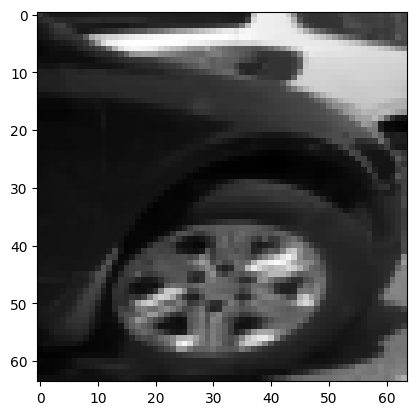

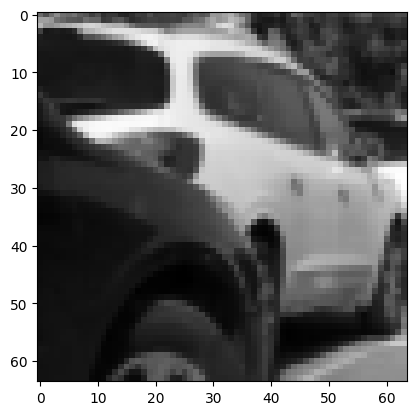

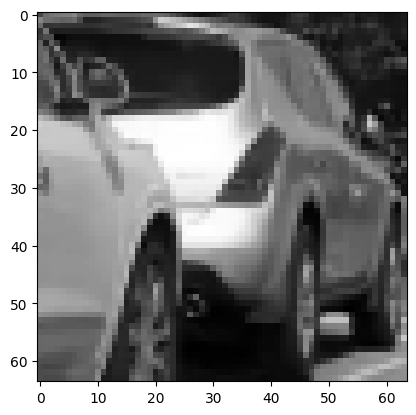

In [3]:
windows = extract_annotations(data_path, train_df, 0, gray=True)
print(f"Number of windows: {len(windows)}")
print(f"Window shape: {windows[0].shape}")
print(f"Window sample: \n{windows[0]}")

for window in windows[:3]:
    if len(windows[0].shape) == 2:
        plt.imshow(window, cmap='gray')
    if len(windows[0].shape) == 3:
        plt.imshow(window)
    plt.show() 

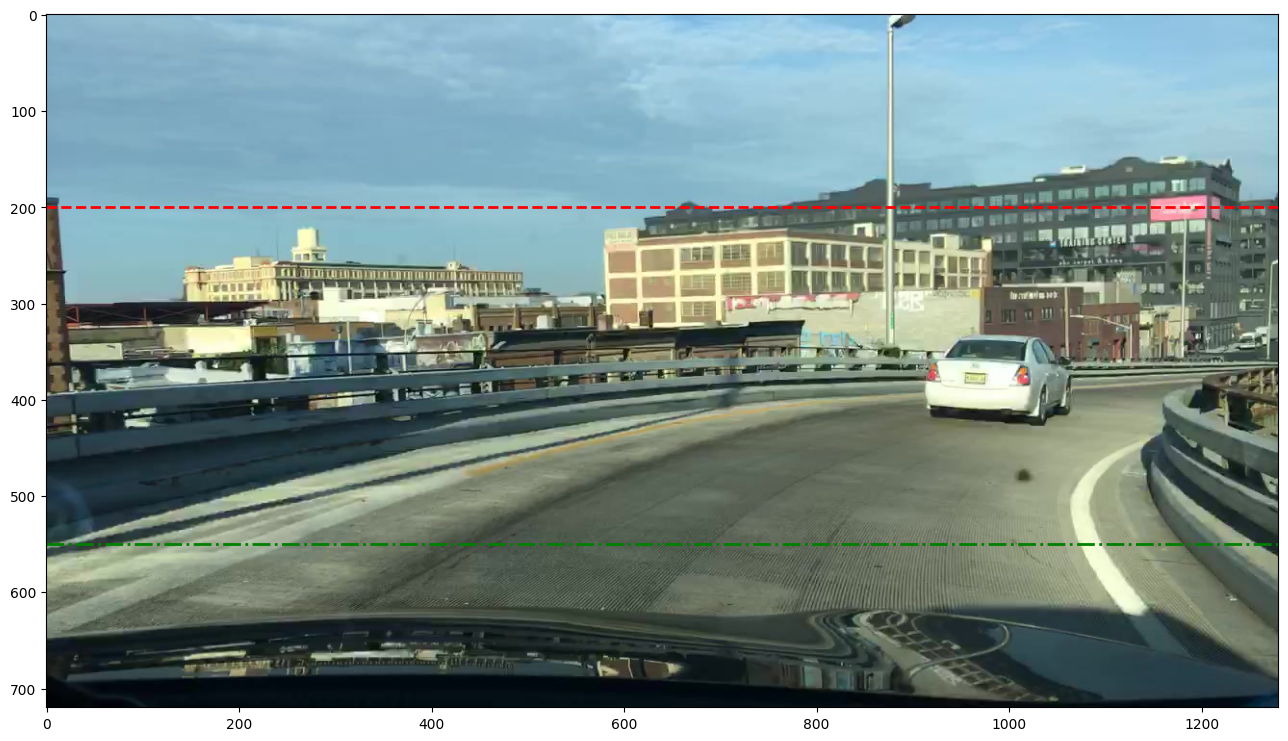

In [4]:
y_start_stop = [200, 550]

frame = read_frame(data_path, train_df, random.randint(0, N))

fig, ax = plt.subplots(figsize=(16,9))
ax.imshow(frame)
ax.axhline(y=y_start_stop[0], color='red', linestyle='--', linewidth=2)
ax.axhline(y=y_start_stop[1], color='green', linestyle='-.', linewidth=2)
plt.show()

# Build non-vehicle dataset

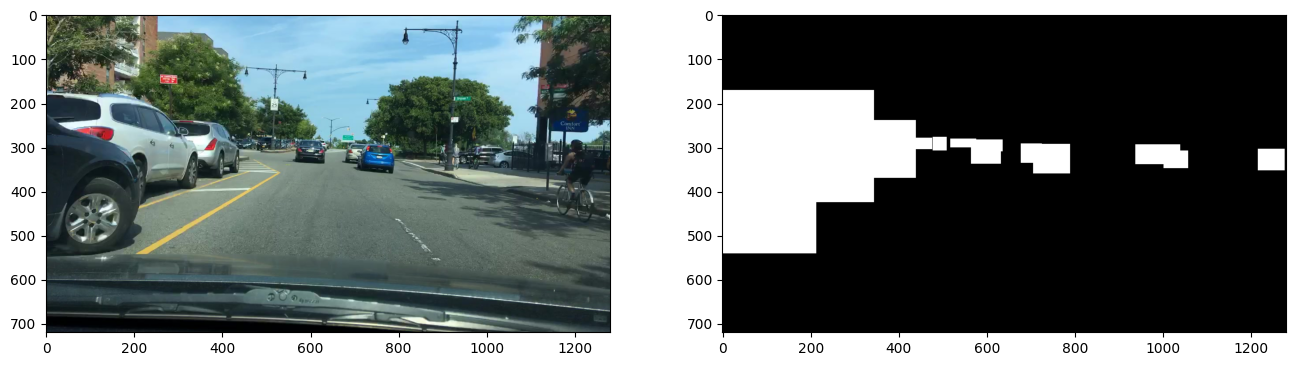

In [5]:
frame = read_frame(data_path, train_df, 0)
vehicle_rectangles = annotations_for_frame(train_df, 0)
vehicle_mask = bounding_boxes_to_mask(vehicle_rectangles, 720, 1280)

plt.figure(figsize= (16,9))
plt.subplot(1,2,1)
plt.imshow(frame)
plt.subplot(1,2,2)
plt.imshow(vehicle_mask, cmap='gray')
plt.show()

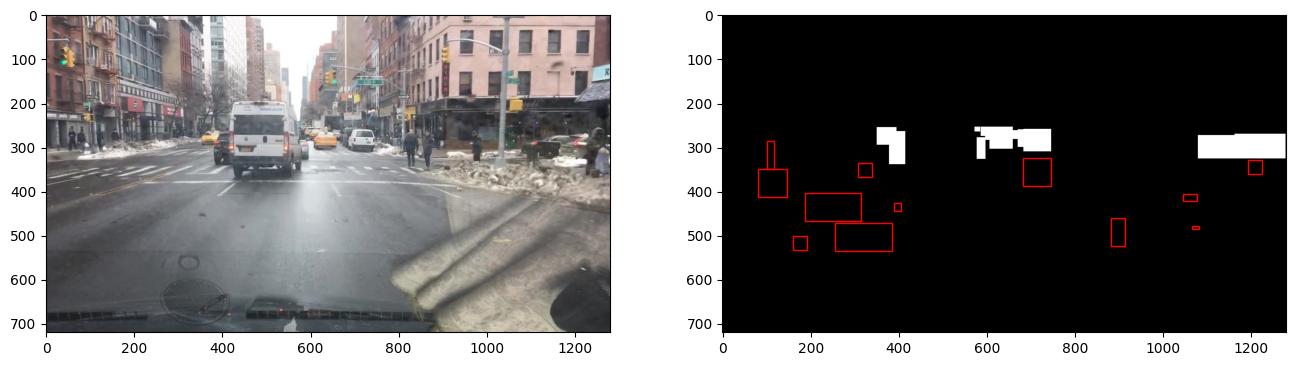

In [22]:
frame_id = random.randint(0, N)

frame = read_frame(data_path, train_df, frame_id)

vehicle_rectangles = annotations_for_frame(train_df, frame_id)
vehicle_mask = bounding_boxes_to_mask(vehicle_rectangles, 720, 1280)

non_vehicle_rectangles = build_non_vehicle_rectangles(
    vehicle_rectangles,
    vertical_bounds = [200, 550]
)

plt.figure(figsize=(16,9))

plt.subplot(1, 2, 1)
plt.imshow(frame)

plt.subplot(1, 2, 2)
plt.imshow(vehicle_mask, cmap='gray')
for rect in non_vehicle_rectangles:
    x, y, w, h = rect
    plt.gca().add_patch(plt.Rectangle((x, y), w, h, edgecolor='red', facecolor='none'))

plt.show()

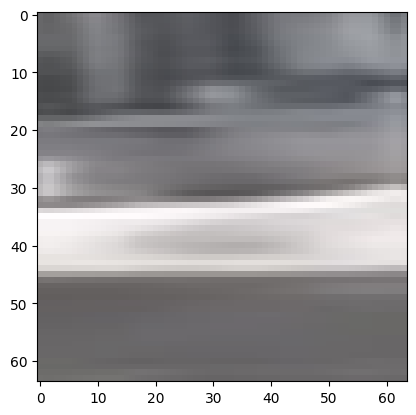

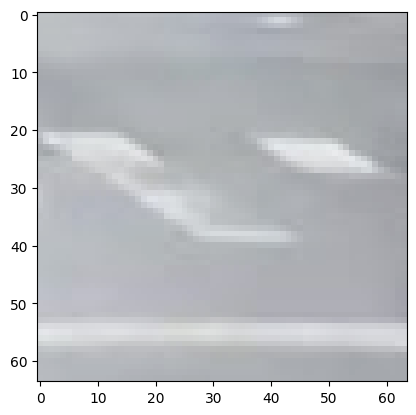

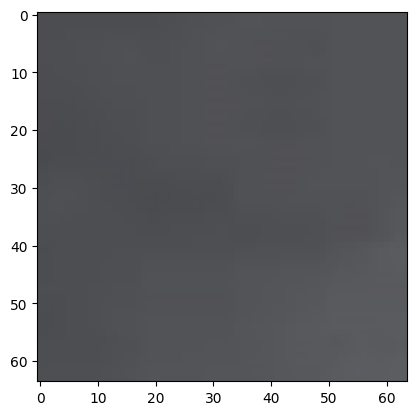

In [24]:
non_vehicle_windows = extract_rectangles(frame, non_vehicle_rectangles)

for window in non_vehicle_windows[:3]:
    plt.imshow(window)
    plt.show() 